In [54]:
from typing import Optional
import numpy as np
import gymnasium as gym


In [55]:
class GridWorldEnv(gym.Env):

    def __init__(self, size: int = 5):
        # The size of the square grid
        self.size = size

        # Define the agent and target location; randomly chosen in `reset` and updated in `step`
        self._agent_location = np.array([-1, -1], dtype=np.int32)
        self._target_location = np.array([-1, -1], dtype=np.int32)

        # Observations are dictionaries with the agent's and the target's location.
        # Each location is encoded as an element of {0, ..., `size`-1}^2
        self.observation_space = gym.spaces.Dict(
            {
                "agent": gym.spaces.Box(0, size - 1, shape=(2,), dtype=int),
                "target": gym.spaces.Box(0, size - 1, shape=(2,), dtype=int),
            }
        )

        # We have 4 actions, corresponding to "right", "up", "left", "down"
        self.action_space = gym.spaces.Discrete(4)
        # Dictionary maps the abstract actions to the directions on the grid
        self._action_to_direction = {
            0: np.array([1, 0]),  # right
            1: np.array([0, 1]),  # up
            2: np.array([-1, 0]),  # left
            3: np.array([0, -1]),  # down
        }

        # Record the steps taken
        self._steps_taken = 0

    def _get_obs(self):
        return {"agent": self._agent_location, "target": self._target_location}

    def _get_info(self):
        return {
            "distance": np.linalg.norm(
                self._agent_location - self._target_location, ord=1
            )
        }

    def reset(self, seed: Optional[int] = None, options: Optional[dict] = None):
        # We need the following line to seed self.np_random
        super().reset(seed=seed)

        # Choose the agent's location uniformly at random
        self._agent_location = self.np_random.integers(0, self.size, size=2, dtype=int)

        # We will sample the target's location randomly until it does not coincide with the agent's location
        self._target_location = self._agent_location
        while np.array_equal(self._target_location, self._agent_location):
            self._target_location = self.np_random.integers(
                0, self.size, size=2, dtype=int
            )
        
        # reset steps
        self._steps_taken = 0

        observation = self._get_obs()
        info = self._get_info()

        return observation, info

    def step(self, action):
        # Map the action (element of {0,1,2,3}) to the direction we walk in
        direction = self._action_to_direction[action]
        # We use `np.clip` to make sure we don't leave the grid bounds
        self._agent_location = np.clip(
            self._agent_location + direction, 0, self.size - 1
        )

        # An environment is completed if and only if the agent has reached the target
        terminated = np.array_equal(self._agent_location, self._target_location)
        truncated = False if self._steps_taken < self.size**2 else True
        reward = (
            1 if terminated else 0
        )  # the agent is only reached at the end of the episode
        observation = self._get_obs()
        info = self._get_info()

        return observation, reward, terminated, truncated, info

In [56]:
# Register the environment
gym.register(
    id="gymnasium_env/GridWorld-v0",
    entry_point=GridWorldEnv,
)

d:\Documents\learn\Gymnasium\.conda\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment gymnasium_env/GridWorld-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [57]:
# gym.pprint_registry()
from gymnasium.wrappers import FlattenObservation
env = gym.make("gymnasium_env/GridWorld-v0")
wrapped_env = FlattenObservation(env)
# print(env.observation_space, wrapped_env.observation_space)

In [58]:
# totally random method
terminated = False
obs, info = wrapped_env.reset()
while not terminated and not truncated:
    action = wrapped_env.action_space.sample()
    obs, reward, terminated, truncated, info = wrapped_env.step(action)
    print(action, obs, reward)

1 [3 3 2 2] 0
2 [2 3 2 2] 0
0 [3 3 2 2] 0
2 [2 3 2 2] 0
1 [2 4 2 2] 0
3 [2 3 2 2] 0
0 [3 3 2 2] 0
1 [3 4 2 2] 0
3 [3 3 2 2] 0
0 [4 3 2 2] 0
3 [4 2 2 2] 0
0 [4 2 2 2] 0
0 [4 2 2 2] 0
1 [4 3 2 2] 0
2 [3 3 2 2] 0
3 [3 2 2 2] 0
0 [4 2 2 2] 0
3 [4 1 2 2] 0
3 [4 0 2 2] 0
3 [4 0 2 2] 0
2 [3 0 2 2] 0
0 [4 0 2 2] 0
0 [4 0 2 2] 0
3 [4 0 2 2] 0
1 [4 1 2 2] 0
0 [4 1 2 2] 0
2 [3 1 2 2] 0
0 [4 1 2 2] 0
3 [4 0 2 2] 0
3 [4 0 2 2] 0
1 [4 1 2 2] 0
0 [4 1 2 2] 0
3 [4 0 2 2] 0
1 [4 1 2 2] 0
1 [4 2 2 2] 0
1 [4 3 2 2] 0
2 [3 3 2 2] 0
3 [3 2 2 2] 0
1 [3 3 2 2] 0
3 [3 2 2 2] 0
0 [4 2 2 2] 0
1 [4 3 2 2] 0
3 [4 2 2 2] 0
0 [4 2 2 2] 0
2 [3 2 2 2] 0
0 [4 2 2 2] 0
3 [4 1 2 2] 0
2 [3 1 2 2] 0
0 [4 1 2 2] 0
2 [3 1 2 2] 0
3 [3 0 2 2] 0
2 [2 0 2 2] 0
3 [2 0 2 2] 0
0 [3 0 2 2] 0
1 [3 1 2 2] 0
2 [2 1 2 2] 0
2 [1 1 2 2] 0
3 [1 0 2 2] 0
2 [0 0 2 2] 0
3 [0 0 2 2] 0
2 [0 0 2 2] 0
0 [1 0 2 2] 0
3 [1 0 2 2] 0
2 [0 0 2 2] 0
3 [0 0 2 2] 0
1 [0 1 2 2] 0
0 [1 1 2 2] 0
1 [1 2 2 2] 0
3 [1 1 2 2] 0
3 [1 0 2 2] 0
3 [1 0 2 2] 0
0 [2 0

In [59]:
from collections import defaultdict

class Agent:
    def __init__(
        self,
        env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def get_action(self, env, obs: tuple[int, int, int, int]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, int, int],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, int, int],
    ):
        """Updates the Q-value of an action."""
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )

        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [69]:
# hyperparameters
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

terminated = False
obs, info = wrapped_env.reset()
agent = Agent(env, learning_rate=learning_rate, initial_epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon)

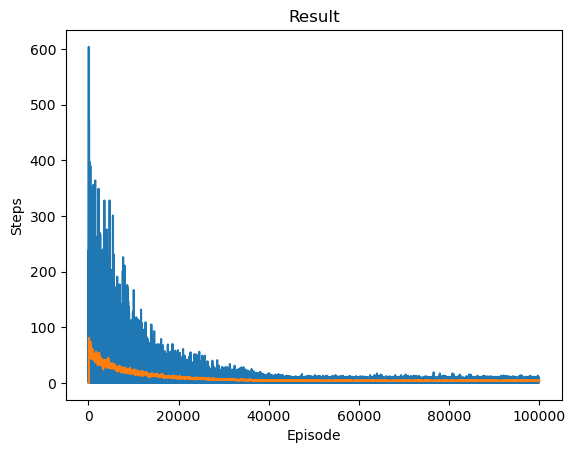

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [70]:
import matplotlib
import matplotlib.pyplot as plt

# set up matplotlib
plt.ion()
is_ipython = "inline" in matplotlib.get_backend()
if is_ipython:
    from IPython import display

steps_list = []
mean_steps_list = [0] * 99

def cal_mean_list():
    mean = np.mean(steps_list[-100:])
    mean_steps_list.append(mean)

def plot_steps(show_result=False):
    plt.figure(1)
    if show_result:
        plt.title("Result")
    else:
        plt.clf()
        plt.title("Training...")
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.plot(steps_list)
    # Take 100 episode averages and plot them too
    if len(steps_list) >= 100:
        plt.plot(mean_steps_list)

    plt.pause(0.001)  # pause a bit so that plots are updated
    
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

for ep in range(n_episodes):
    obs, info = wrapped_env.reset()
    done = False
    steps = 0
    while not done:
        action = agent.get_action(wrapped_env, tuple(obs))
        next_obs, reward, terminated, truncated, info = wrapped_env.step(action)
        agent.update(tuple(obs), action, reward, terminated, tuple(next_obs))
        # print(action, next_obs, reward)
        obs = next_obs
        done = terminated or truncated
        steps += 1
    agent.decay_epsilon()
    steps_list.append(steps)
    cal_mean_list()
    if ep % 1000 == 0:
        plot_steps()
    # print(f"Episodes{ep+1}: {steps}")

plot_steps(show_result=True)
plt.ioff()
plt.show()